# A Notebook to Train a Classification Model for Pneumonia Detection

## Import Dependencies

In [1]:
import os
import yaml
from numpy import array
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import pyplot
from matplotlib.image import imread

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dropout,Dense,BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, SpatialDropout2D
from tensorflow.keras.optimizers import Adam as adam
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model 

from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import EarlyStopping

## Load the Data

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Pneumonia/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Pneumonia


## Structurize Data for Model

In [3]:
"""
 Perform Data Augmentation: shearing, rotation, zooming, flipping etc.
 Make height and width dimensions of 300.
 
"""

'\n Perform Data Augmentation: shearing, rotation, zooming, flipping etc.\n Make height and width dimensions of 300.\n \n'

In [4]:
batch_size = 16

# Training Augmentation configuration
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Validation Augmentation - Only Rescaling
val_datagen = ImageDataGenerator(rescale = 1./255)

# Generates batches of Augmented Image data
train_generator = train_datagen.flow_from_directory('Data/chest_xray/train/', target_size = (128, 128), 
                                                    batch_size = batch_size,
                                                    class_mode = 'binary') 

# Generator for validation data
validation_generator = val_datagen.flow_from_directory('Data/chest_xray/test/', 
                                                        target_size = (128, 128),
                                                        batch_size = batch_size,
                                                        class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Build the Model

In [5]:
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))
model.add(SpatialDropout2D(0.1))

model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.2))

model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.2))

model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.5))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 32, 32, 32)        0

## Train the Model

In [6]:
# Implement Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Train the Model
history = model.fit(train_generator,
                    epochs = 120,
                    steps_per_epoch=326,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[es])

loss, accuracy = model.evaluate(validation_generator)

print("\nModel's Evaluation Metrics: ")
print("---------------------------")
print("Accuracy: {} \nLoss: {}".format(accuracy, loss))

Epoch 1/120
326/326 [==============================] - 196s 595ms/step - loss: 0.6706 - accuracy: 0.6984 - val_loss: 0.6630 - val_accuracy: 0.6250
Epoch 2/120
326/326 [==============================] - 193s 592ms/step - loss: 0.5913 - accuracy: 0.7301 - val_loss: 0.6359 - val_accuracy: 0.6250
Epoch 3/120
326/326 [==============================] - 193s 592ms/step - loss: 0.5725 - accuracy: 0.7387 - val_loss: 0.6359 - val_accuracy: 0.6250
Epoch 4/120
326/326 [==============================] - 193s 592ms/step - loss: 0.5413 - accuracy: 0.7421 - val_loss: 0.5750 - val_accuracy: 0.6250
Epoch 5/120
326/326 [==============================] - 193s 592ms/step - loss: 0.4857 - accuracy: 0.7596 - val_loss: 0.4398 - val_accuracy: 0.8189
Epoch 6/120
326/326 [==============================] - 193s 591ms/step - loss: 0.4331 - accuracy: 0.7958 - val_loss: 0.4681 - val_accuracy: 0.8397
Epoch 7/120
326/326 [==============================] - 193s 590ms/step - loss: 0.3541 - accuracy: 0.8336 - val_loss: 0

## Plot the Training Graphs

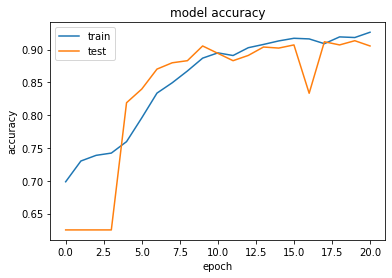

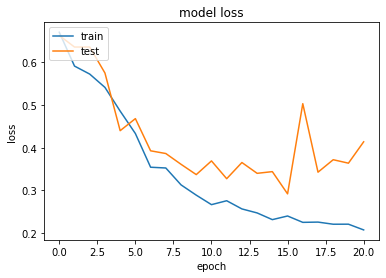

In [7]:
'''
method: plot_training
input_parameters: history
output_parameters: none
description: This method plots the training and validation performance over the epochs.
'''


def plot_training(history):
    # Accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_training(history)

## Save the Model

In [8]:
model.save("disease_classifier.h5")

## Test The Model

In [9]:
def load_image(filename):
    img = load_img(filename, target_size=(128, 128))
    img = img_to_array(img) 
    img = np.expand_dims(img, axis=0)
    return img
 
img = load_image('Data/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg')
model = tf.keras.models.load_model('disease_classifier.h5')
result = model.predict(img)
result = np.argmax(result[0])
result

0

In [10]:
def load_image(filename):
    img = load_img(filename, target_size=(128, 128))
    img = img_to_array(img) 
    img = np.expand_dims(img, axis=0)
    return img
 
img = load_image('Data/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg')
model = tf.keras.models.load_model('disease_classifier.h5')
result = model.predict(img)
result = np.argmax(result[0])
result

0

In [11]:
#Confution Matrix and Classification Report

Y_pred = model.predict_generator(validation_generator)
Y_pred = Y_pred.flatten()
y_pred = []
for i in Y_pred:
  if i < 0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = ['Normal', 'Pneunomonia']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 74 160]
 [133 257]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.36      0.32      0.34       234
 Pneunomonia       0.62      0.66      0.64       390

    accuracy                           0.53       624
   macro avg       0.49      0.49      0.49       624
weighted avg       0.52      0.53      0.52       624

